In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
from datetime import date
import os

### Dados Gerais

In [111]:
import pandas as pd

# Carregar o DataFrame
proposals_path = 'C:\\Users\\leibr\\Documents\\Lappis\\conjuv\\data\\conjuv_propostas.csv'
df_sheets = pd.read_csv(proposals_path, sep=';', encoding='utf-8')

# Filtrar os dados desejados
data = (df_sheets['participatory_space/url'] == 'http://brasilparticipativo.presidencia.gov.br/assemblies/confjuv4?assembly_slug=confjuv4') & \
       (~df_sheets['state'].isin(['rejected', 'withdrawn']))

new_data = df_sheets[data]

# Calcular o número total de propostas (número de linhas)
total_propostas = len(new_data)

# Calcular o número total de votos (soma da coluna 'supports')
total_votos = new_data['supports'].sum()

# Calcular o total de comentários (soma da coluna 'comments')
total_comentarios = new_data['comments'].sum()

# Criar um DataFrame com os resultados
dados_gerais = pd.DataFrame({
    'Número Total de Propostas': [total_propostas],
    'Número Total de Votos': [total_votos],
    'Total de Comentários': [total_comentarios]
})

# Converter o DataFrame para formato Markdown
dados_gerais = dados_gerais.to_markdown(index=False)


### Propostas, Votos e Comentários no Tempo

C:\Users\leibr\AppData\Local\Temp\ipykernel_7148\2772736748.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['published_at'] = pd.to_datetime(new_data['published_at'], format='%d/%m/%Y %H:%M')


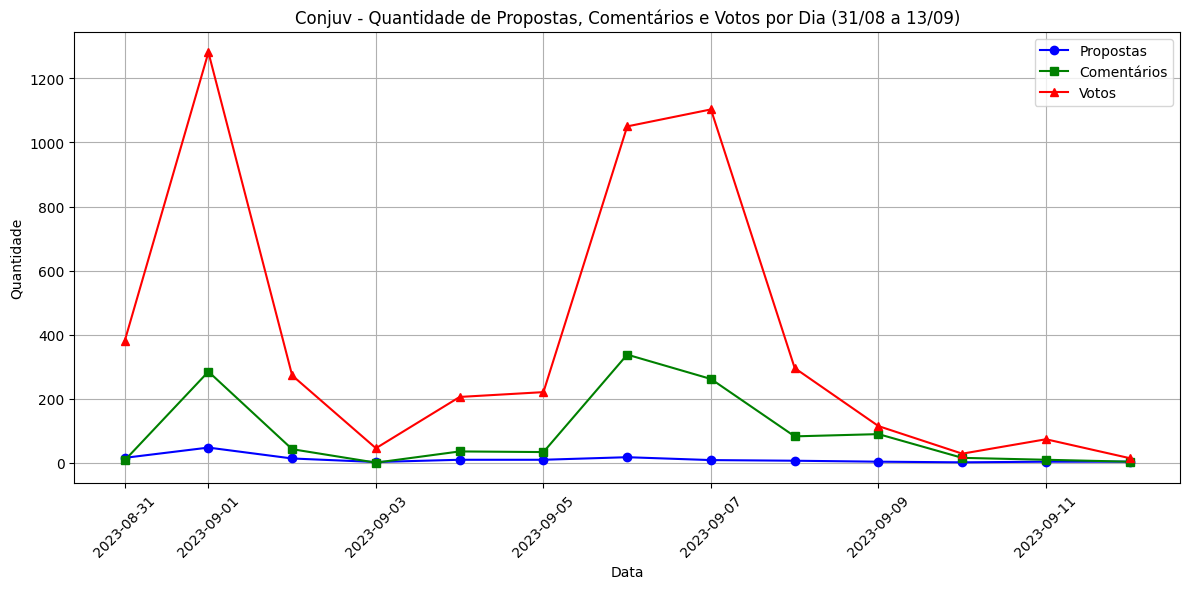

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o DataFrame
proposals_path = 'C:\\Users\\leibr\\Documents\\Lappis\\conjuv\\data\\conjuv_propostas.csv'
df_sheets = pd.read_csv(proposals_path, sep=';', encoding='utf-8')

# Filtrar os dados desejados
data = (df_sheets['participatory_space/url'] == 'http://brasilparticipativo.presidencia.gov.br/assemblies/confjuv4?assembly_slug=confjuv4') & \
       (~df_sheets['state'].isin(['rejected', 'withdrawn']))

new_data = df_sheets[data]

# Converter a coluna 'published_at' para o formato de data e hora
new_data['published_at'] = pd.to_datetime(new_data['published_at'], format='%d/%m/%Y %H:%M')

# Filtrar os dados para o intervalo de datas desejado
start_date = '2023-08-31'
end_date = '2023-09-13'
filtered_data = new_data[(new_data['published_at'] >= start_date) & (filtered_data['published_at'] <= end_date)].copy()

# Criar uma coluna com a data (sem a hora)
filtered_data['Data'] = filtered_data['published_at'].dt.date

# Calcular o número total de propostas por dia
total_propostas_por_dia = filtered_data.groupby('Data')['id'].count()

# Calcular o número total de comentários por dia
total_comentarios_por_dia = filtered_data.groupby('Data')['comments'].sum()

# Calcular o número total de votos por dia
total_votos_por_dia = filtered_data.groupby('Data')['supports'].sum()

# Plotar gráfico de linhas com todas as séries de dados
plt.figure(figsize=(12, 6))
plt.plot(total_propostas_por_dia.index, total_propostas_por_dia.values, label='Propostas', color='blue', marker='o')
plt.plot(total_comentarios_por_dia.index, total_comentarios_por_dia.values, label='Comentários', color='green', marker='s')
plt.plot(total_votos_por_dia.index, total_votos_por_dia.values, label='Votos', color='red', marker='^')

plt.xlabel('Data')
plt.ylabel('Quantidade')
plt.title('Conjuv - Quantidade de Propostas, Comentários e Votos por Dia (31/08 a 13/09)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Salvar o gráfico em um arquivo PNG
plt.savefig('C:\\Users\\leibr\\Documents\\Lappis\\conjuv\\data\\conjuv_grafico.png')


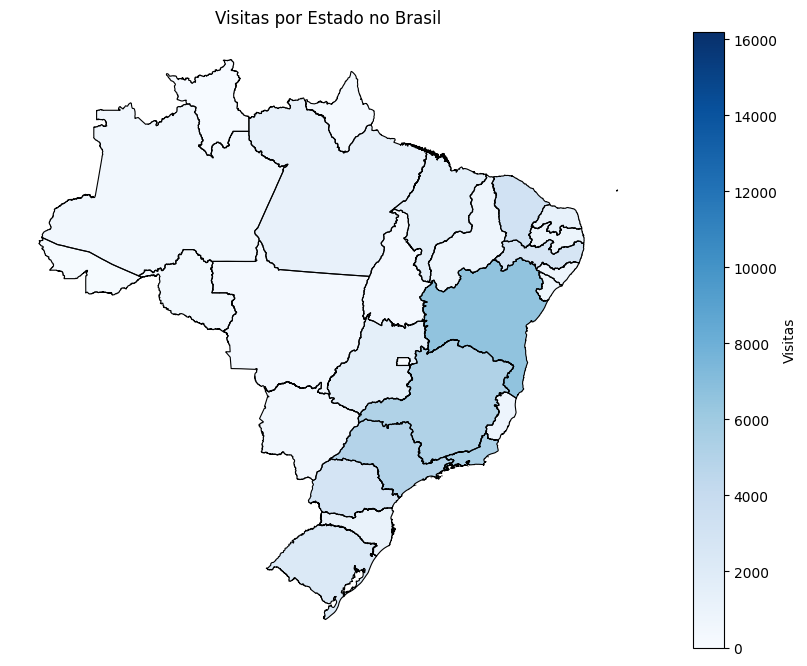

In [113]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Carregar o shapefile dos estados brasileiros
shapefile_path = 'C:\\Users\\leibr\\Documents\\Lappis\\conjuv\\data\\shapefile\\estados_2010.shp'
gdf = gpd.read_file(shapefile_path, encoding='ISO-8859-1')

# Carregar o DataFrame com os dados de acessos por estado
acessos_path = 'C:\\Users\\leibr\\Documents\\Lappis\\conjuv\\data\\conjuv_geografia.csv'
df_acessos = pd.read_csv(acessos_path, encoding='utf-8', sep=';')

# Juntar os dados do DataFrame aos dados do shapefile usando a coluna 'nome'
gdf = gdf.merge(df_acessos, left_on='nome', right_on='Estados', how='left')

# Criar uma figura e eixo
fig, ax = plt.subplots(figsize=(12, 8))

# Definir limites personalizados para a escala de cores com base nos dados
vmin, vmax = 0, 16210  # Use os valores mínimo e máximo dos dados fornecidos

# Plotar o mapa de contagem de acessos em cada estado em tons de azul com limites personalizados
gdf.boundary.plot(ax=ax, linewidth=0.8, color='k')
gdf.plot(column='Acessos', ax=ax, cmap='Blues', legend=True, legend_kwds={'label': "Visitas"}, vmin=vmin, vmax=vmax)
plt.title("Visitas por Estado no Brasil")
plt.axis('off')  # Desativar os eixos

# Salvar o gráfico em um arquivo PNG
plt.savefig('C:\\Users\\leibr\\Documents\\Lappis\\conjuv\\data\\conjuv_mapa_acessos.png')

### Dados de acesso

In [114]:
import pandas as pd

# Caminho para o arquivo CSV
acesso_path = 'C:\\Users\\leibr\\Documents\\Lappis\\conjuv\\data\\conjuv_acessos.csv'

# Carregar o arquivo CSV em UTF-8 e usar ponto e vírgula como separador
acesso_df = pd.read_csv(acesso_path, sep=';', encoding='utf-8')

# Função para converter o formato de tempo em segundos
def convert_tempo_to_seconds(tempo_str):
    partes = tempo_str.split(':')
    return int(partes[0]) * 3600 + int(partes[1]) * 60 + int(partes[2])

# Calcular a soma das colunas 'Visualizações únicas de páginas' e 'Visualizações de páginas'
soma_visualizacoes_unicas = acesso_df['Visualizações únicas de páginas'].sum()
soma_visualizacoes_paginas = acesso_df['Visualizações de páginas'].sum()

# Calcular a média da coluna 'Tempo médio na página' (convertido para segundos)
media_tempo_medio_pagina = acesso_df['Tempo médio na página'].apply(convert_tempo_to_seconds).mean()

# Calcular a média da coluna 'Taxa de ressalto' (convertido para valores entre 0 e 1)
media_taxa_ressalto = acesso_df['Taxa de ressalto'].str.rstrip('%').astype(float).mean() / 100

# Criar um novo DataFrame com os resultados
resumo_acessos = pd.DataFrame({
    'Visualizações únicas de páginas': [soma_visualizacoes_unicas],
    'Visualizações de páginas': [soma_visualizacoes_paginas],
    'Tempo médio na página (segundos)': [media_tempo_medio_pagina],
    'Taxa de ressalto': [media_taxa_ressalto]
})

# Converter o DataFrame para formato Markdown
resumo_acessos_markdown = resumo_acessos.to_markdown(index=False)



### Top 20 propostas por voto

In [115]:
proposals_path = 'C:\\Users\\leibr\\Documents\\Lappis\\conjuv\\data\\conjuv_propostas.csv'

df_sheets = pd.read_csv(proposals_path, sep=';', encoding='utf-8')

data = (df_sheets['participatory_space/url'] == 'http://brasilparticipativo.presidencia.gov.br/assemblies/confjuv4?assembly_slug=confjuv4') & \
         (~df_sheets['state'].isin(['rejected', 'withdrawn']))


new_data = df_sheets[data]

report_path = 'relatorio_conjuv.md'

In [116]:

new_data = new_data.sort_values(by='supports', ascending=False)

top_20_programas = new_data.head(20)

tabela_ranking = top_20_programas[['id', 'title/pt-BR', 'category/name/pt-BR', 'supports', 'comments']].copy()
tabela_ranking.columns = ['ID', 'Propostas', 'Temas', 'Nº de Votos', 'Nº de Comentários']


# URL base para as propostas
base_url = "http://brasilparticipativo.presidencia.gov.br/assemblies/confjuv4/f/10/proposals/"

# Função para criar o link para cada proposta
def create_link(proposal_id, proposal_name):
    url = f"{base_url}{proposal_id}"
    return f"[{proposal_name}]({url})"

# Aplicar a função para criar os links na coluna 'Propostas'
tabela_ranking['Propostas'] = tabela_ranking.apply(lambda row: create_link(row['ID'], row['Propostas']), axis=1)

# Formatar a tabela em Markdown
tabela_ranking_markdown = tabulate(tabela_ranking, headers='keys', tablefmt='pipe', showindex=False)


### Ranking por tema

In [117]:

temas_df = new_data.groupby('category/name/pt-BR').agg({
    'title/pt-BR': 'nunique',  
    'supports': 'sum',        
    'comments': 'sum'        
}).reset_index()

temas_df.columns = ['Temas', 'Nº de Propostas', 'Nº de Votos', 'Nº de Comentários']

temas_df_markdown = tabulate(temas_df, headers='keys', tablefmt='pipe')

In [118]:
total_propostas = len(new_data)
propostas_acima_de_300_votos = len(new_data[new_data['supports'] > 300])
propostas_abaixo_de_20_votos = len(new_data[new_data['supports'] < 20])
porcentagem_abaixo_de_20_votos = (propostas_abaixo_de_20_votos / total_propostas) * 100


### Ranking Tópicos

In [119]:
# Caminho para o arquivo CSV
topics_path = 'C:\\Users\\leibr\\Documents\\Lappis\\conjuv\\data\\topics.csv'

# Carregar o arquivo topics.csv em UTF-8 e usar ponto e vírgula como separador
topics_df = pd.read_csv(topics_path, sep=';', encoding='utf-8')

# Selecionar as colunas desejadas
selected_columns = ['tema', 'titulo', 'proposta', 'Tópico 1', 'Tópico 2', 'Tópico 3', 'Tópico 4', 'Tópico 5']
topics_df = topics_df[selected_columns]

# Função para extrair o nome do tópico sem a porcentagem
def extract_topic_name(topic_with_percentage):
    if isinstance(topic_with_percentage, str):
        return topic_with_percentage.split('(')[0].strip()
    else:
        return ''

# Aplicar a função para remover a porcentagem dos tópicos
for col in ['Tópico 1', 'Tópico 2', 'Tópico 3', 'Tópico 4', 'Tópico 5']:
    topics_df[col] = topics_df[col].apply(extract_topic_name)


In [120]:
import pandas as pd

# Suponhamos que você já carregou e pré-processou os dados conforme mencionado anteriormente.

# Função para contar propostas por tópico em uma coluna
def count_proposals_by_topic(topic_column):
    topics = topic_column.str.split(', ')
    flattened_topics = [item.strip() for sublist in topics.dropna() for item in sublist]
    topic_counts = pd.Series(flattened_topics).value_counts()
    return topic_counts

# Contagem de propostas por tópico nas colunas 'Tópico 1' e 'Tópico 2'
topic_1_counts = count_proposals_by_topic(topics_df['Tópico 1'])
topic_2_counts = count_proposals_by_topic(topics_df['Tópico 2'])

# Crie DataFrames para os top 10 tópicos em 'Tópico 1' e 'Tópico 2'
top_10_topic_1 = pd.DataFrame({'Tópico 1': topic_1_counts.index[:10], 'Qtd Propostas': topic_1_counts.values[:10]})
top_10_topic_2 = pd.DataFrame({'Tópico 2': topic_2_counts.index[:10], 'Qtd Propostas': topic_2_counts.values[:10]})

# Remova o número 8418 da coluna 'Qtd Propostas' em ambos os DataFrames

top_10_topic_1['Qtd Propostas'] = top_10_topic_1['Qtd Propostas'].replace('8418', '')
top_10_topic_2['Qtd Propostas'] = top_10_topic_2['Qtd Propostas'].replace('8418', '')

# Combine os DataFrames novamente
combined_df = pd.concat([top_10_topic_1, top_10_topic_2], axis=1)



In [121]:

titulo = f"<center>Relatório Conjuv (31/08/2023 - {date.today().strftime('%d/%m/%Y')})</center>"

report_path = 'relatorio_conjuv.md'


with open(report_path, 'w', encoding='utf-8') as report_file:
    report_file.write(f"# {titulo}\n\n")
    report_file.write("</p>\n\n")

with open(report_path, 'a', encoding='utf-8') as report_file:
    report_file.write("\n# Sumário:\n")
    report_file.write("- [Dados Totais da Conjuv](#dados-totais-da-conjuv)\n")
    report_file.write("- [Dados de Acesso](#dados-de-acesso)\n")
    report_file.write("- [TOP 20 Propostas por Voto no Geral](#top-20-propostas-por-voto-no-geral)\n")
    report_file.write("- [Análise Qualitativa das Propostas](#análise-qualitativa-das-propostas)\n")
    report_file.write("- [Ranking por Tópicos](#ranking-por-tópicos)\n")

with open(report_path, 'a', encoding='utf-8') as report_file:
    report_file.write(f'## *Dados Totais da Conjuv*\n{dados_gerais}\n\n')
    report_file.write(f'## *Dados de Acesso*\n{resumo_acessos_markdown}\n\n')
    report_file.write(f'### **Perfil do visitante**\n\n')
    report_file.write('\n<p align="center">\n')
    report_file.write('  <img src="../conjuv/data/painel_visitante.png"\n alt=" Exemplo de um Painel de Visitante"/>\n')
    report_file.write('</p>\n\n')
    # Adicionar o primeiro gráfico com título
    report_file.write(f"### *Qtd de Propostas, Votos e Comentários até 13/08*\n")
    report_file.write('<p align="center">\n')
    report_file.write('  <img src="../conjuv/data/conjuv_grafico.png"\n alt="Descrição do Gráfico 1"/>\n')
    report_file.write('</p>\n\n')
    
    # Adicionar o segundo gráfico com título
    report_file.write(f"### **Mapa com a Qtd de visitas por UF**\n")
    report_file.write('<p align="center">\n')
    report_file.write('  <img src="../conjuv/data/conjuv_mapa_acessos.png"\n alt="Descrição do Gráfico 2"/>\n')
    report_file.write('</p>\n\n')
    # Adicione aqui os dois gráficos em png com seus titulos, no mesmo padrão do markdown
    report_file.write(f"## *TOP 20 Propostas por Voto no Geral*\n{tabela_ranking_markdown}\n\n")
    report_file.write(f"## *Análise Qualitativa das Propostas* \n Os temas com o maior número de propostas são: \n{temas_df_markdown}\n")
    report_file.write(f"- De {total_propostas} propostas atuais, apenas {propostas_acima_de_300_votos} delas apresentam votação acima de 300;\n")
    report_file.write(f"- {propostas_abaixo_de_20_votos} propostas estão com menos de 20 votos ({porcentagem_abaixo_de_20_votos:.2f}% do total de propostas);\n")
    report_file.write(f"## *Ranking por Tópicos*\n")
    report_file.write(tabulate(combined_df, headers='keys', tablefmt='pipe', showindex=False))

   

